In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import time

DOT_COLOR = 'deeppink'
PREDICTED_COLOR = 'black'

In [2]:
# Generate synthetic data

NOISE = 0.7
START = 0
END = 10

np.random.seed(int(time.time()))
X = np.sort(END * np.random.rand(80, 1), axis=0)
# function is y = sin(x) * x + noise
y = np.sin(X).ravel() * X.ravel() + np.random.normal(0, NOISE, X.shape[0])

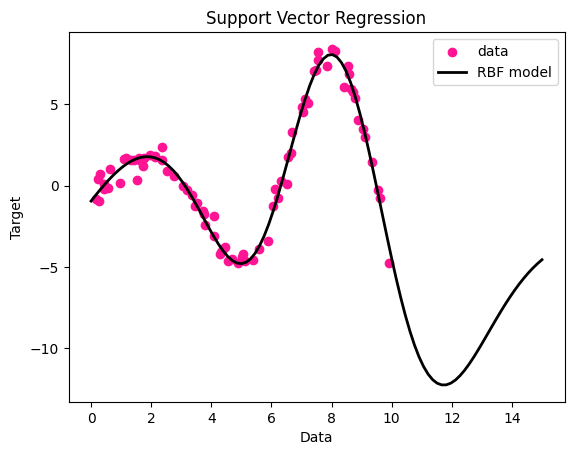

In [5]:
# Fit the SVR model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
svr_rbf.fit(X, y)

# Predict on new data points
X_test = np.linspace(START, END*1.5, 100)[:, np.newaxis]
y_pred = svr_rbf.predict(X_test)

# Plot the results
plt.scatter(X, y, color=DOT_COLOR, label='data')
plt.plot(X_test, y_pred, color=PREDICTED_COLOR, lw=2, label='RBF model')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

Fitting SVR with kernel linear
Fitting took 0.009496450424194336 seconds
Fitting SVR with kernel poly
Fitting took 0.018414020538330078 seconds
Fitting SVR with kernel rbf
Fitting took 0.0 seconds
Fitting SVR with kernel sigmoid
Fitting took 0.00014448165893554688 seconds


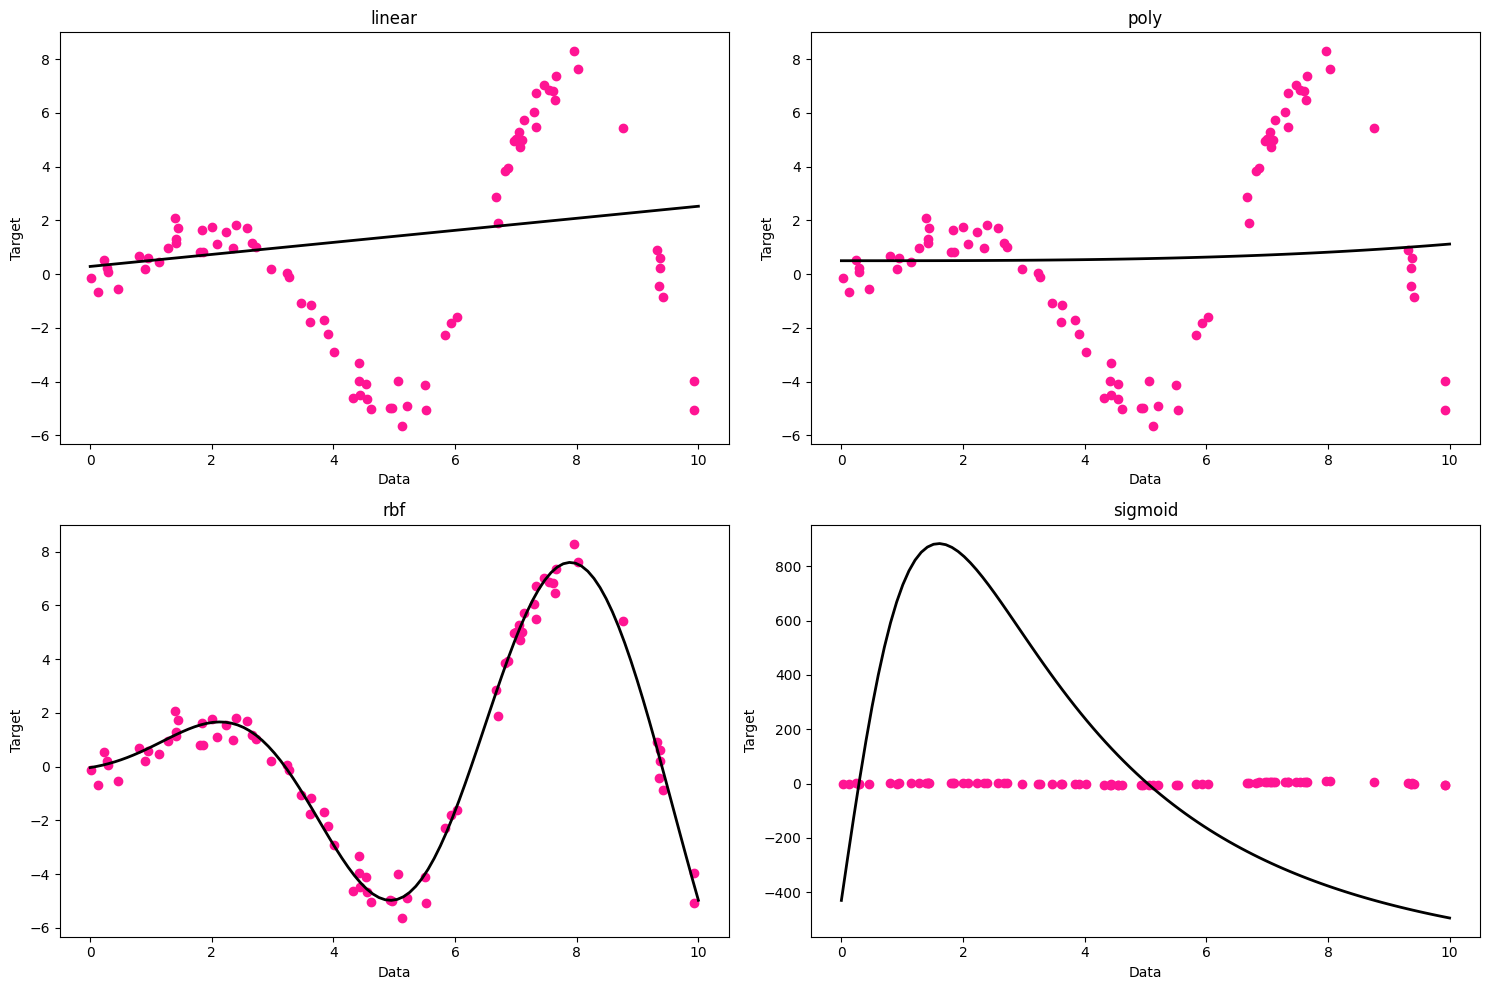

In [10]:
# Testing different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
fig = plt.figure(figsize=(15, 10))
for kernel in kernels:
    print(f'Fitting SVR with kernel {kernel}')
    start = time.time()
    svr = SVR(kernel=kernel, C=100, gamma=0.1)
    svr.fit(X, y)
    print(f'Fitting took {time.time() - start} seconds')
    y_pred = svr.predict(X_test)
    plt.subplot(2, 2, kernels.index(kernel) + 1)
    plt.scatter(X, y, color=DOT_COLOR, label='data')
    plt.plot(X_test, y_pred, color=PREDICTED_COLOR, lw=2, label='model')
    plt.xlabel('Data')
    plt.ylabel('Target')
    plt.title(kernel)
    
plt.tight_layout()
plt.show()

Fitting SVR with C=0.1
Fitting took 0.0010504722595214844 seconds
Fitting SVR with C=1
Fitting took 0.0019996166229248047 seconds
Fitting SVR with C=50
Fitting took 0.0009987354278564453 seconds
Fitting SVR with C=100
Fitting took 0.0019986629486083984 seconds
Fitting SVR with C=500
Fitting took 0.0019981861114501953 seconds
Fitting SVR with C=1000
Fitting took 0.008378744125366211 seconds


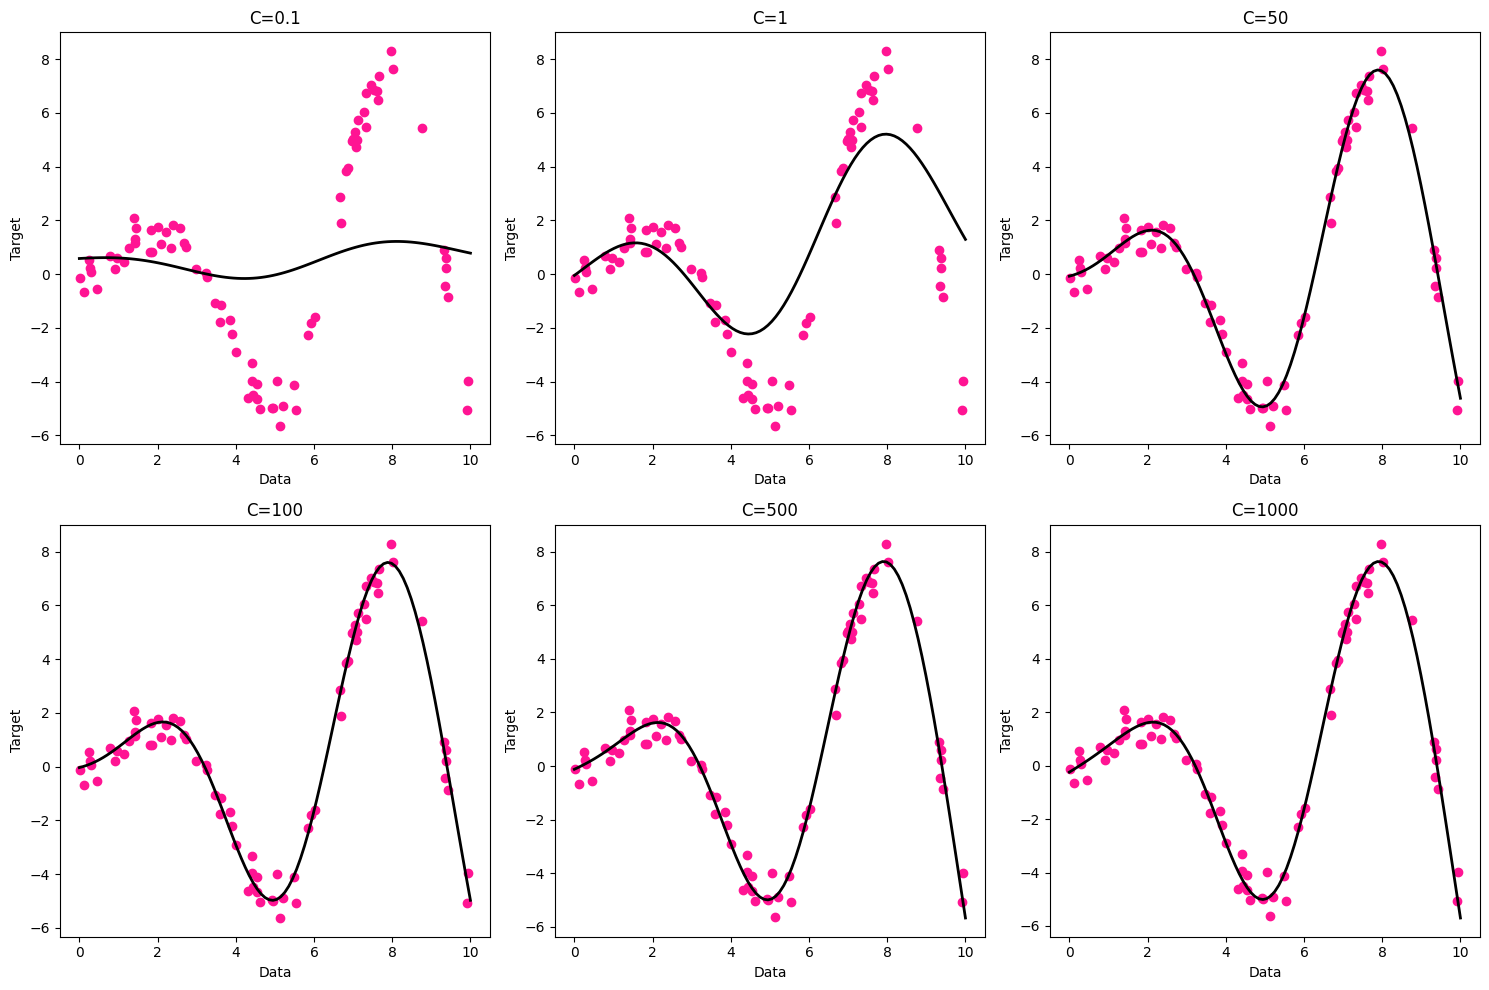

In [11]:
# Testing different C regularization parameters

C_values = [0.1, 1, 50, 100, 500, 1000]

fig = plt.figure(figsize=(15, 10))
for C in C_values:
    print(f'Fitting SVR with C={C}')
    start = time.time()
    svr = SVR(kernel='rbf', C=C, gamma=0.1)
    svr.fit(X, y)
    print(f'Fitting took {time.time() - start} seconds')
    y_pred = svr.predict(X_test)
    plt.subplot(2, 3, C_values.index(C) + 1)
    plt.scatter(X, y, color=DOT_COLOR, label='data')
    plt.plot(X_test, y_pred, color=PREDICTED_COLOR, lw=2, label='model')
    plt.xlabel('Data')
    plt.ylabel('Target')
    plt.title(f'C={C}')

plt.tight_layout()
plt.show()

Fitting SVR with gamma=0.001
Fitting took 0.0021982192993164062 seconds
Fitting SVR with gamma=0.01
Fitting took 0.0017242431640625 seconds
Fitting SVR with gamma=0.1
Fitting took 0.0009996891021728516 seconds
Fitting SVR with gamma=1
Fitting took 0.00400090217590332 seconds
Fitting SVR with gamma=10
Fitting took 0.002005338668823242 seconds
Fitting SVR with gamma=100
Fitting took 0.0010008811950683594 seconds


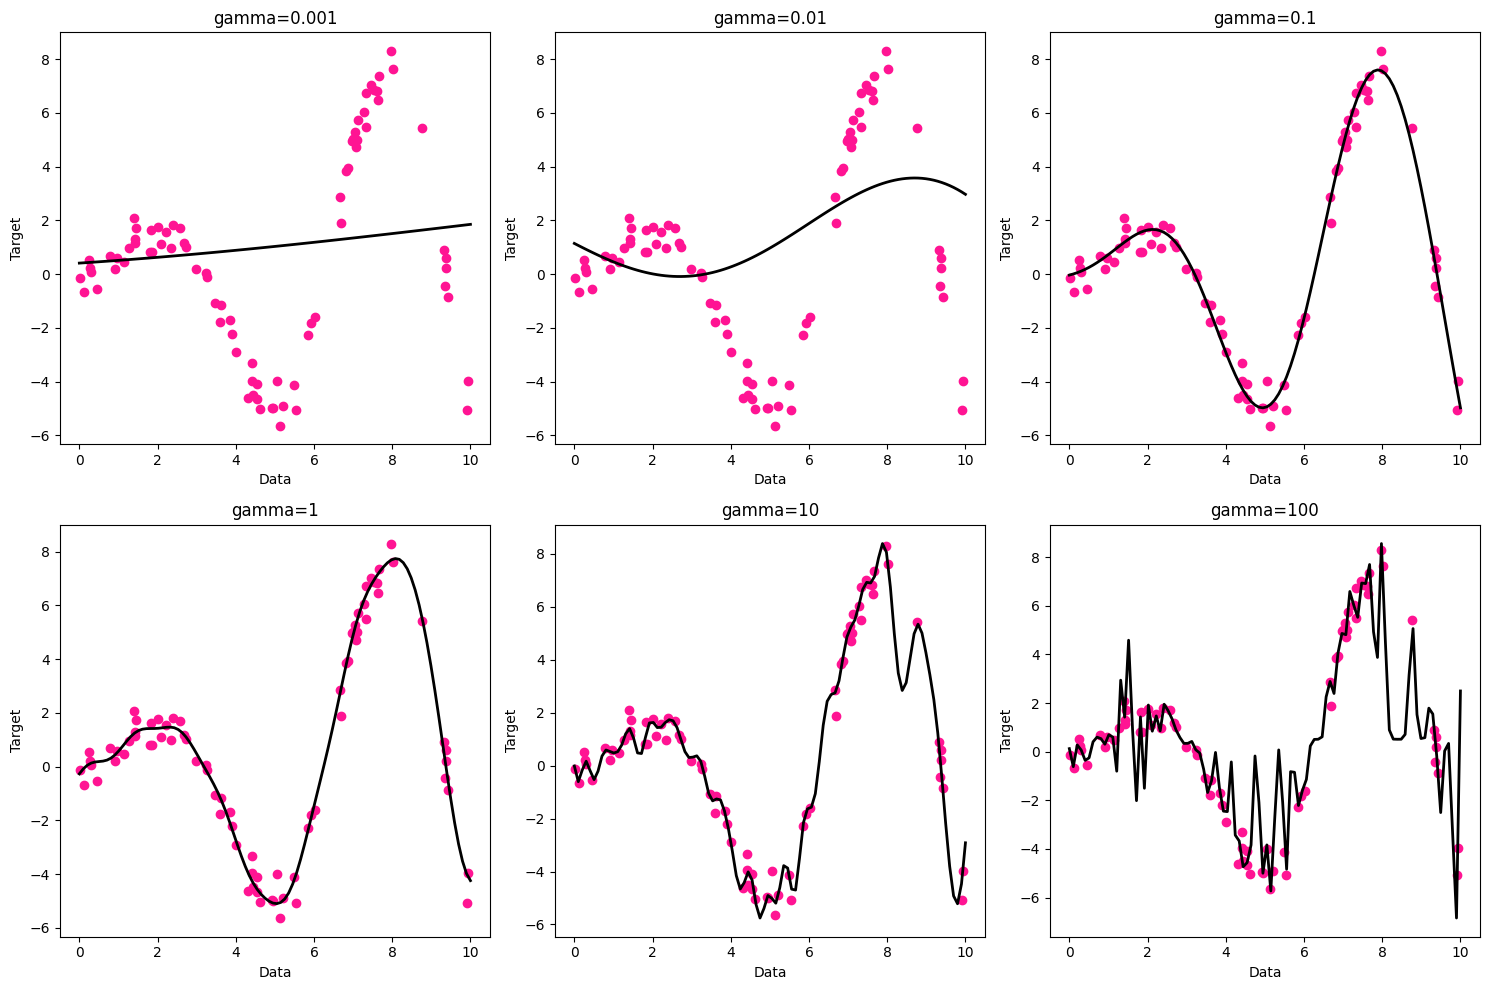

In [12]:
# Testing gammas, the kernel coefficient
gamma_values = [0.001, 0.01, 0.1, 1, 10, 100]

fig = plt.figure(figsize=(15, 10))
for gamma in gamma_values:
    print(f'Fitting SVR with gamma={gamma}')
    start = time.time()
    svr = SVR(kernel='rbf', C=100, gamma=gamma)
    svr.fit(X, y)
    print(f'Fitting took {time.time() - start} seconds')
    y_pred = svr.predict(X_test)
    plt.subplot(2, 3, gamma_values.index(gamma) + 1)
    plt.scatter(X, y, color=DOT_COLOR, label='data')
    plt.plot(X_test, y_pred, color=PREDICTED_COLOR, lw=2, label='model')
    plt.xlabel('Data')
    plt.ylabel('Target')
    plt.title(f'gamma={gamma}')

plt.tight_layout()
plt.show()